### Explanatory
- The idea behind this is to create visualisations to compare the distributions of random samples we extract from the gaussian kde and compare that to the actual distribution and its probabilities

In [3]:
import pandas as pd
import numpy as np
import glob
from scipy import stats
import matplotlib.pyplot as plt
pickle_files = glob.glob("/Users/emmanuels/Documents/AttributionData/Data/Probabilities/**/*.pck",recursive=True)


In [5]:
#visualisation function
def visualise_kde(sample):
    data = pd.read_pickle(sample)
    lab = sample.split('/')[7][:-4]
    x = np.linspace(start=stats.norm.ppf(0.1),
                    stop=stats.norm.ppf(0.99),num=100)
    fig,ax = plt.subplots()
    ax.plot(x, data.pdf(x), linestyle='dashed', c='red', lw=2,
        alpha=0.8)
    ax.set_title(lab+' KDE visualisation',fontsize=15)
    #sample plot
    ax_two = ax.twinx()
    #take a sample of 10000 as a dataframe
    sample_two = pd.DataFrame(data.resample(10000))
    sample_two = sample_two.transpose()
    sample_two.columns = ['samples']
    ax_two = plt.hist(sample_two['samples'],bins=10)
    return ax,ax_two

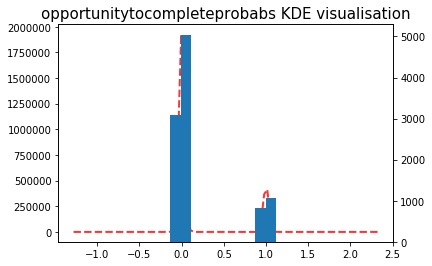

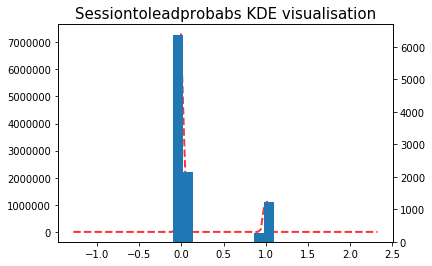

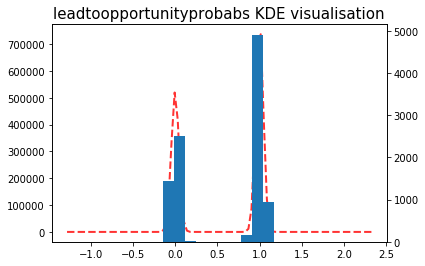

In [6]:
#create visualisations to compare sample to actual distribution
for i in pickle_files:
    visualise_kde(i)